<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/04.01-Visualizacao-de-Dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Visualização de Dados: Matplotlib e Seaborn

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))

Adaptado de: [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) e [*Scikit-Learn User Guide*](https://scikit-learn.org/stable/modules/clustering.html)


## Visualização de Dados: Matplotlib e Seaborn

O Matplotlib é uma biblioteca de visualização de dados em Python, construída em arrays NumPy e integrada à pilha SciPy. Criado por John Hunter em 2002, inicialmente como um patch para IPython, o Matplotlib evoluiu para se tornar uma ferramenta fundamental para visualização científica. Sua capacidade de funcionar em vários sistemas operacionais e backends gráficos, apoiada pelo financiamento do Space Telescope Science Institute, contribuiu para sua ampla adoção.


Versões recentes permitem a definição fácil de novos estilos de plotagem globalmente, e pacotes como Seaborn, ggpy, HoloViews, Altair e Pandas servem como wrappers modernos para a API do Matplotlib. 



Apesar da ascensão dessas outras ferramentas, o Matplotlib continua desempenhando um papel vital na visualização de devido à sua flexibilidade e capacidade de ajuste fino na sintaxe.

#### Importando Matplotlib



Assim como usamos a abreviatura `np` para NumPy e `pd`` para Pandas, usaremos algumas abreviações padrão para importações do Matplotlib:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Plotando a partir de um notebook IPython 



No notebook IPython você também tem a opção de incorporar gráficos diretamente no notebook, com duas opções possíveis:

- `%matplotlib notebook` levará a gráficos interativos incorporados ao notebook
- `%matplotlib inline` levará a imagens estáticas do seu gráfico incorporadas ao notebook

In [2]:
%matplotlib inline

Depois de executar este comando (isso precisa ser feito apenas uma vez por kernel/sessão), qualquer célula dentro do notebook que cria um gráfico irá incorporar uma imagem PNG do gráfico resultante:

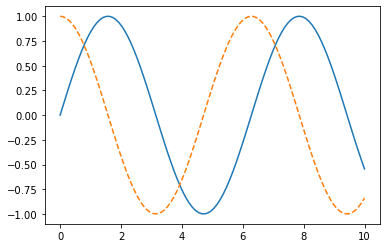

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)
x
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

#### Salvando figuras em um arquivo


Um recurso interessante do Matplotlib é a capacidade de salvar figuras em uma ampla variedade de formatos por meio do comando `savefig()`.

In [4]:
fig.savefig('my_figure.png')

Agora temos um arquivo chamado `my_figure.png` no diretório de trabalho atual:

In [5]:
!ls -lh my_figure.* 

-rw-rw-r-- 1 paulodetarso paulodetarso 21K nov 17 10:17 my_figure.png


Em `savefig()`, o formato do arquivo é inferido a partir da extensão do nome de arquivo fornecido. 

A lista de tipos de arquivos suportados pode ser encontrada em seu sistema usando o seguinte método:

In [6]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

#### Estilos de uso do Matplotlib



Um recurso potencialmente confuso do Matplotlib são suas interfaces duplas: uma interface conveniente baseada em estado no estilo MATLAB e uma interface orientada a objetos mais poderosa.

##### MATLAB-style Interface


Matplotlib foi originalmente escrito como uma alternativa Python para usuários do MATLAB, e grande parte de sua sintaxe reflete esse fato. 
As ferramentas estilo MATLAB estão contidas na interface pyplot (`plt`). 

Por exemplo, o código a seguir provavelmente parecerá bastante familiar aos usuários do MATLAB:

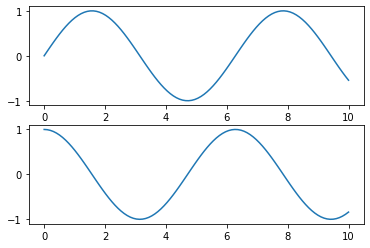

In [7]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# # create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));



##### Object-oriented interface


A interface orientada a objetos está disponível para situações mais complicadas e para quando você deseja ter mais controle sobre sua figura. 
Em vez de depender de alguma noção de figura ou eixos "ativos", na interface orientada a objetos as funções de plotagem são métodos de objetos explícitos `Figure` e  `Axes`. 



Para recriar o gráfico anterior usando este estilo de plotagem, você pode fazer o seguinte:

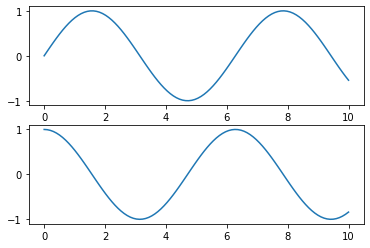

In [8]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));


### Gráficos de linhas simples

Talvez o mais simples de todos os gráficos seja a visualização de uma única função $y = f(x)$.

No Matplotlib, a *figura* (uma instância da classe `plt.Figure`) pode ser pensada como um único contêiner que contém todos os objetos que representam eixos, gráficos, texto e rótulos. 

Os *eixos* (uma instância da classe `plt.Axes`) são o que vemos acima: uma caixa delimitadora com marcas de seleção e rótulos, que eventualmente conterá os elementos do gráfico que compõem nossa visualização. 

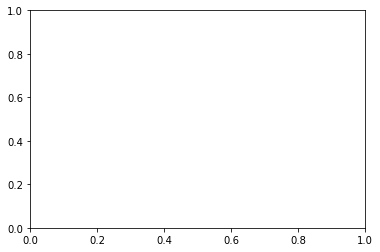

In [9]:
fig = plt.figure()
ax = plt.axes()

Usaremos o nome da variável `fig` para nos referirmos a uma instância de figura e `ax` a uma instância de eixos ou grupo de instâncias de eixos.

Depois de criarmos os eixos, podemos usar a função `ax.plot` para plotar alguns dados.

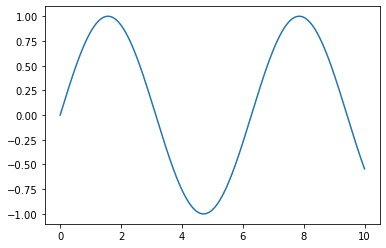

In [10]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));
# x

Se quisermos criar uma única figura com múltiplas linhas, podemos simplesmente chamar a função `plot` várias vezes:

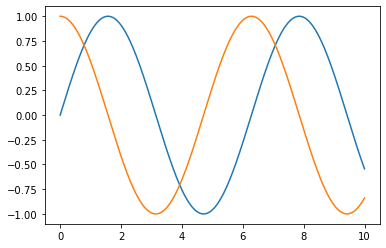

In [11]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Para ajustar a cor, você pode usar a palavra-chave `color`, que aceita um argumento de string representando praticamente qualquer cor imaginável. A cor pode ser especificada de várias maneiras:

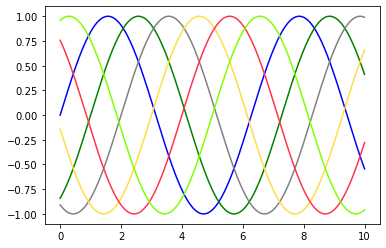

In [12]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.5')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Se nenhuma cor for especificada, o Matplotlib percorrerá automaticamente um conjunto de cores padrão para várias linhas.


Da mesma forma, o estilo da linha pode ser ajustado usando a palavra-chave `linestyle`:

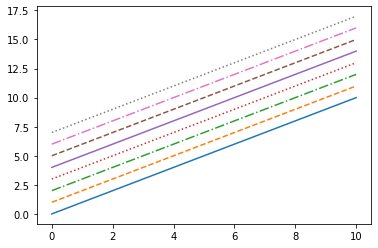

In [13]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Se você quiser ser extremamente conciso, `linestyle` e `color` podem ser combinados em um único argumento sem palavra-chave:

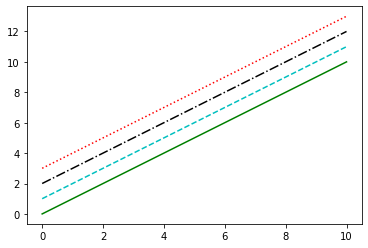

In [14]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

 A maneira mais básica de ajustar os limites do eixo é usar os métodos `plt.xlim()` e `plt.ylim()`.

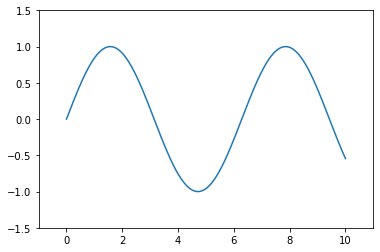

In [15]:
plt.plot(x, np.sin(x))
 
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

O método `plt.axis()` permite definir os limites *x* e *y* com uma única chamada, passando uma lista que especifica `[xmin, xmax, ymin, ymax]`:

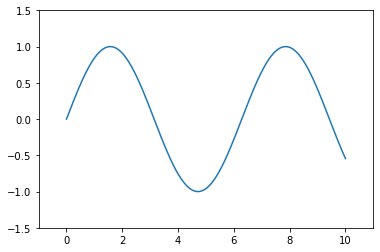

In [16]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

Observe aqui a confusão potencial entre `axes` (com *e*) e `axis` (com *i*).

O método `plt.axis()` permite que você faça coisas como restringir automaticamente os limites do gráfico atual:

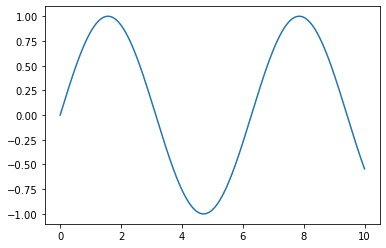

In [17]:
plt.plot(x, np.sin(x))
plt.axis('tight'); 

Ele permite especificações de nível ainda mais alto, como garantir uma proporção igual para que, na tela, uma unidade *x* seja igual a uma unidade *y*:

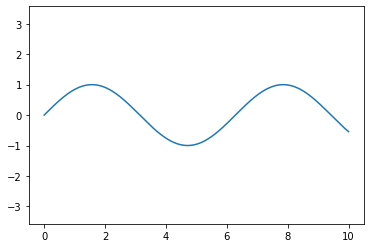

In [18]:
plt.plot(x, np.sin(x))
plt.axis('equal');

Existem métodos que podem ser usados ​​para títulos, rótulos de eixos e legendas simples.

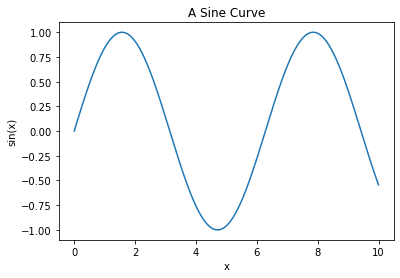

In [19]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

A posição, tamanho e estilo desses rótulos podem ser ajustados usando argumentos opcionais para a função. 

Quando múltiplas linhas estão sendo mostradas dentro de um único eixo, pode ser útil criar uma legenda de plotagem que rotule cada tipo de linha. Isso pode ser feito por meio do método `plt.legend()`.

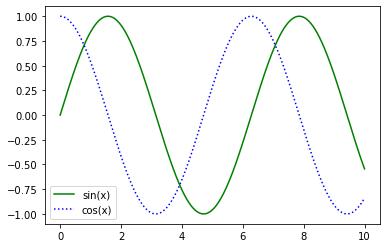

In [20]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')

plt.legend();

Na interface orientada a objetos, em vez de chamar essas funções individualmente, geralmente é mais conveniente usar o método `ax.set()` para definir todas essas propriedades de uma vez:

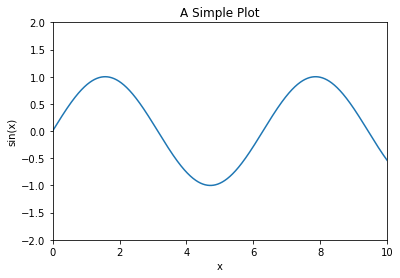

In [21]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),xlabel='x', ylabel='sin(x)',title='A Simple Plot');

### Gráficos de dispersão simples

As funções `plt.plot`/`ax.plot` também pode produzir gráficos de dispersão:

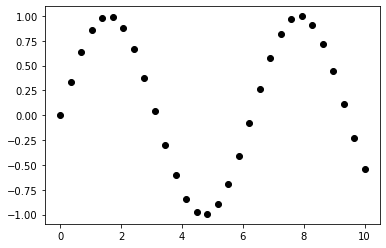

In [22]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

O terceiro argumento na chamada de função é um caractere que representa o tipo de símbolo usado para a plotagem. Assim como você pode especificar opções como `'-'`, `'--'` para controlar o estilo da linha, o estilo do marcador possui seu próprio conjunto de códigos de sequência curtos. A lista completa de símbolos disponíveis pode ser vista na documentação do plt.plot, ou na documentação online do Matplotlib. A maioria das possibilidades é bastante intuitiva:

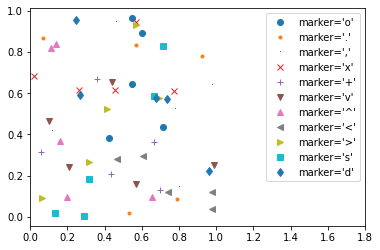

In [23]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label=f"marker='{marker}'")
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Esses códigos de caracteres podem ser usados ​​junto com códigos de linhas e cores para traçar pontos junto com uma linha conectando-os:

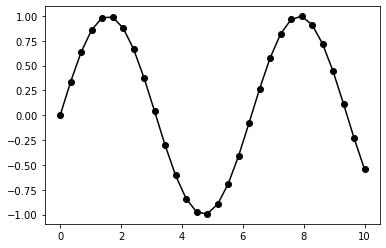

In [24]:
plt.plot(x, y, '-ok');

Argumentos adicionais de palavras-chave para `plt.plot` especificam uma ampla gama de propriedades das linhas e marcadores:

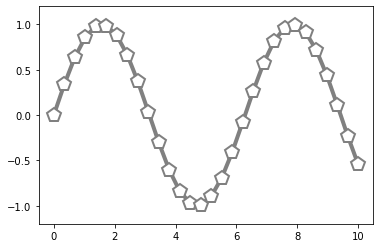

In [25]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

#### Gráficos de dispersão com ``plt.scatter``

Um segundo método mais poderoso de criar gráficos de dispersão é a função `plt.scatter`, que pode ser usada de forma muito semelhante à função `plt.plot`:

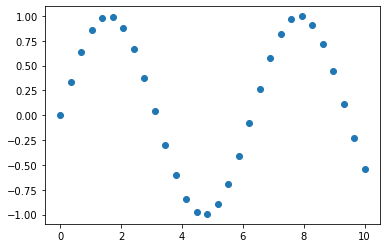

In [26]:
plt.scatter(x, y, marker='o');

A principal diferença de `plt.scatter` e `plt.plot` é que ele pode ser usado para criar gráficos de dispersão onde as propriedades individuais de cada ponto (tamanho, cor da face, cor da borda, etc.) podem ser controladas individualmente ou mapeadas para dados.


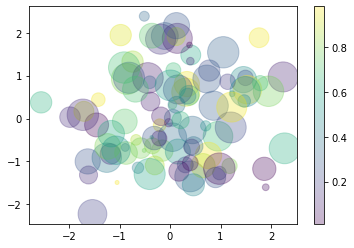

In [27]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Desta forma, a cor e o tamanho dos pontos podem ser utilizados para transmitir informações na visualização, a fim de visualizar dados multidimensionais.



Podemos, por exemplo, visualizar diversos aspectos de um *dataset*, como o Iris do Scikit-Learn:

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


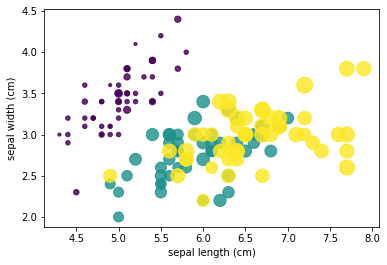

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.82, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Gráficos de dispersão multicoloridos e com vários recursos como este podem ser úteis tanto para exploração quanto para apresentação de dados.

Ao escolher entre `plt.plot` e `plt.scatter` em Python para visualização de dados, a eficiência é mais notável em conjuntos de dados grandes. `plt.plot` é geralmente mais eficiente que `plt.scatter`, especialmente porque este último renderiza diferentes tamanhos e/ou cores para cada ponto, resultando em trabalho adicional. 

Em contraste, `plt.plot` trata os pontos como clones, o que é mais eficiente para grandes conjuntos de dados, pois a determinação da aparência é feita apenas uma vez para todo o conjunto. Portanto, para conjuntos de dados extensos, `plt.plot` é preferível devido ao melhor desempenho.

### Histogramas, binnings e densidade

Um histograma simples pode ser um excelente primeiro passo na compreensão de um conjunto de dados.

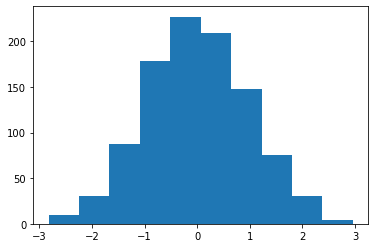

In [29]:
data = np.random.randn(1000)
plt.hist(data);

A função ``hist()`` possui muitas opções para ajustar o cálculo e a exibição; aqui está um exemplo de um histograma mais personalizado:

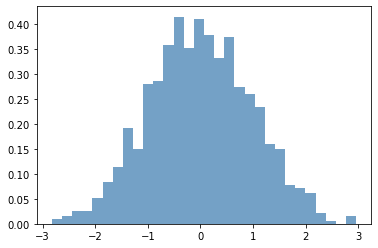

In [30]:
plt.hist(data, bins=30, density=True, alpha=0.75, histtype='stepfilled', color='steelblue', edgecolor='none');

A combinação `histtype='stepfilled'` com alguma transparência `alpha` é muito útil ao comparar histogramas de várias distribuições:

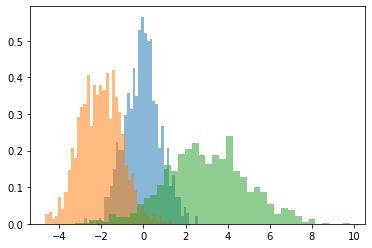

In [31]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.53, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

##### Histogramas e binnings bidimensionais


Também podemos criar histogramas em duas dimensões dividindo os pontos entre compartimentos bidimensionais.

/tmp/ipykernel_173510/2410261808.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x, y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [1, 2]], size=10000).T


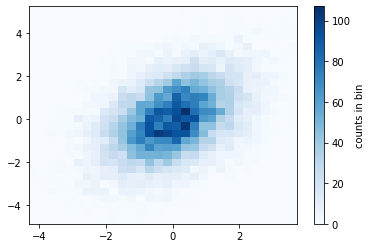

In [32]:
x, y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [1, 2]], size=10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')


O Matplotlib também fornece a função `plt.hexbin`, que representará um conjunto de dados bidimensional agrupado em uma grade de hexágonos:

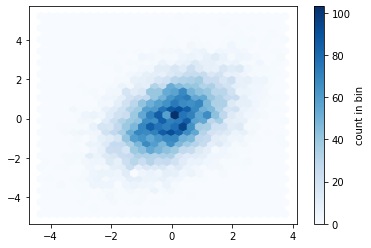

In [33]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

##### Kernel density estimation

KDE pode ser pensado como uma forma de "espalhar" os pontos no espaço e somar o resultado para obter uma aparência suave.

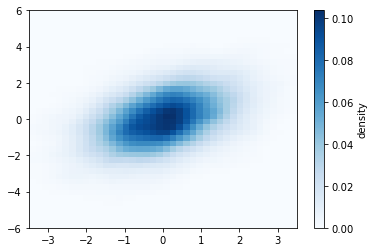

In [34]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),origin='lower', aspect='auto',extent=[-3.5, 3.5, -6, 6],cmap='Blues')
cb = plt.colorbar()
cb.set_label("density") 

### Subplots

Às vezes, é útil comparar diferentes visualizações de dados lado a lado. Para isso, o Matplotlib possui o conceito de **subplots**: grupos de eixos menores que podem coexistir dentro de uma única figura. Esses subplots podem ser inserções, grades de gráficos ou outros layouts mais complicados. 

O método mais básico de criar um eixo é usar a função ``plt.axes``. Por padrão, isso cria um objeto de eixo que preenche toda a figura. 
``plt.axes`` também aceita um argumento opcional que é uma lista de quatro números no sistema de coordenadas da figura. 
Esses números representam ``[left, bottom, width, height]`` no sistema de coordenadas da figura, que varia de 0 no canto inferior esquerdo da 1 no canto superior direito da figura.



Por exemplo, podemos criar um eixo secundário no canto superior direito de outro eixo definindo as posições *x* e *y* como 0.65 (ou seja, começando em 65% da largura e 65% da altura da figura) e as extensões de *x* e *y* como 0.2 (ou seja, o tamanho do eixo é 20% da largura e 20% da altura da figura):

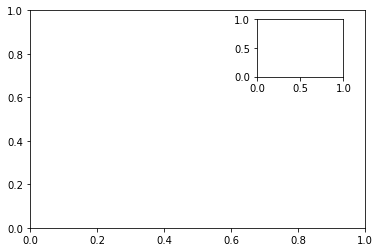

In [35]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

O equivalente a este comando na interface orientada a objetos é ``fig.add_axes()``. Vamos usar isso para criar dois eixos empilhados verticalmente:


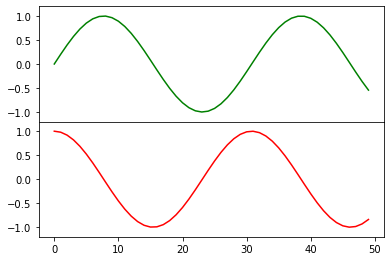

In [36]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],ylim=(-1.2, 1.2))

x = np.linspace(0, 10)

ax1.plot(np.sin(x),'g')
ax2.plot(np.cos(x),'r');

Colunas ou linhas alinhadas de subplots são uma necessidade comum o suficiente para que o Matplotlib tenha várias rotinas que facilitam sua criação. 
A mais básica delas é ``plt.subplot()``, que cria um único subplot dentro de uma grade. 



Este comando recebe três argumentos inteiros: o número de linhas, o número de colunas e o índice do gráfico a ser criado neste esquema, que varia do canto superior esquerdo para o canto inferior direito:

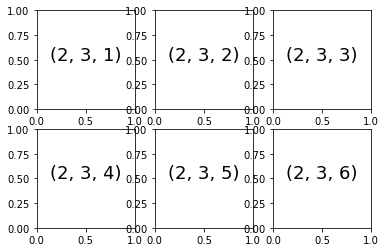

In [37]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

O comando ``plt.subplots_adjust`` pode ser usado para ajustar o espaçamento entre esses gráficos. O código a seguir utiliza o comando ``fig.add_subplot()``:

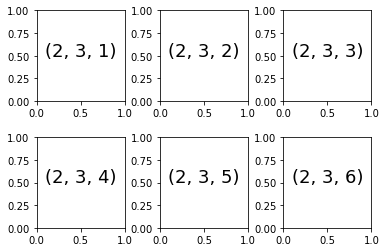

In [38]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

##### ``plt.subplots``: A Grade Inteira de uma Só Vez


Matplotlib possui a função ``plt.subplots()`` que, em vez de criar um único subplot, esta função cria uma grade completa de subplots em uma única linha, retornando-os em uma matriz NumPy. Os argumentos são o número de linhas e o número de colunas, juntamente com palavras-chave opcionais como ``sharex`` e ``sharey``, que permitem especificar as relações entre diferentes eixos.



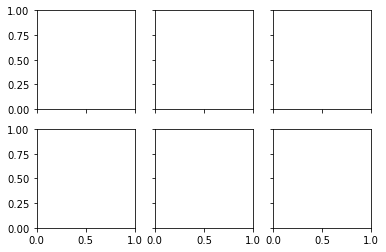

In [39]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Observe que, ao especificarmos ``sharex`` e ``sharey``, automaticamente removemos os rótulos internos na grade para deixar o gráfico mais limpo. A grade resultante de instâncias de eixos é retornada dentro de uma matriz NumPy, permitindo a especificação conveniente dos eixos desejados usando a notação padrão de indexação de array:

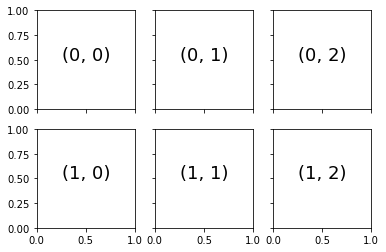

In [40]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),fontsize=18, ha='center')
fig

##### ``plt.GridSpec``: grades mais complexas

O objeto ``plt.GridSpec()`` não cria um gráfico por si só; é simplesmente uma interface conveniente reconhecida pelo comando ``plt.subplot()``.
Por exemplo, um gridspec para uma grade de duas linhas e três colunas com algum espaço de largura e altura especificado se parece com isto:


In [41]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

A partir disso, podemos especificar as localizações e extensões dos subplots usando a sintaxe de fatiamento do Python:


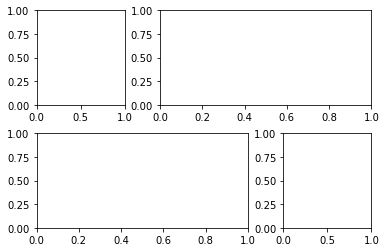

In [42]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Esse tipo de alinhamento flexível em grade tem uma ampla variedade de usos, como criar gráficos de histograma multi-eixos:


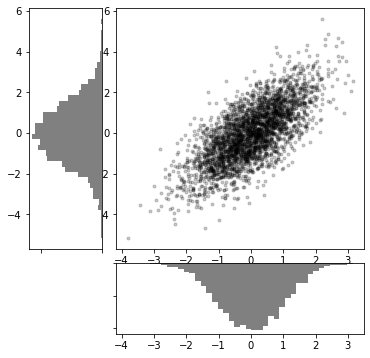

In [43]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',orientation='horizontal', color='gray')
y_hist.invert_xaxis()

#### Texto e Anotações

Criar uma boa visualização envolve orientar o leitor para que a figura conte uma história. Em alguns casos, essa história pode ser contada de maneira totalmente visual, sem a necessidade de texto adicional, mas em outros, pequenas dicas e rótulos textuais são necessários. 

Vamos visualizar alguns dados de Taxa de Nascimentos dos EUA, que podem ser baixados em [https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv](https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv).



In [44]:
import pandas as pd
from datetime import datetime

births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day) for (month, day) in births_by_date.index]


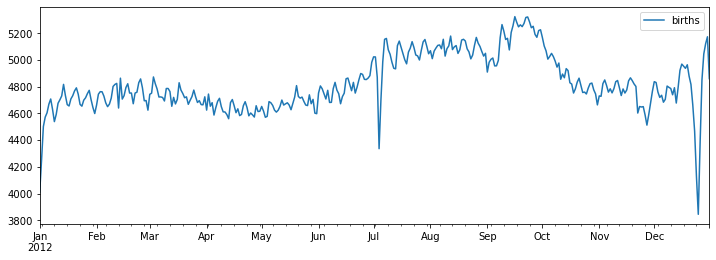

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

Ao visualizarmos dados como este, muitas vezes é útil anotar certas características do gráfico para chamar a atenção do leitor. Isso pode ser feito manualmente com o comando ``plt.text``/``ax.text``, que colocará texto em um valor específico de *x*/*y*:

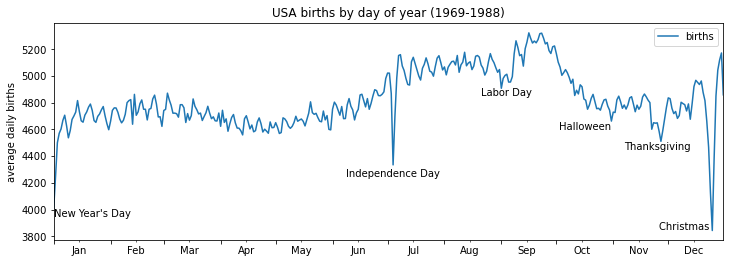

In [46]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='k')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Podemos ainda inserir setas e anotações no gráfico:

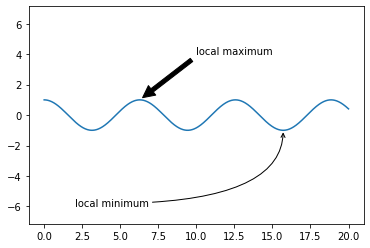

In [47]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90")); 

O estilo da seta é controlado através do dicionário ``arrowprops``, que possui inúmeras opções disponíveis. 


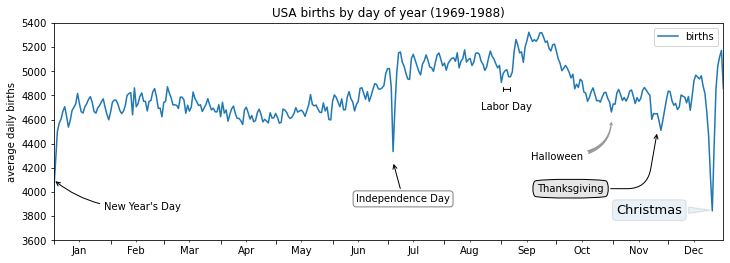

In [48]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',            xytext=(50, -30), textcoords='offset points',            arrowprops=dict(arrowstyle="->",                            connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',            bbox=dict(boxstyle="round", fc="none", ec="gray"),            xytext=(10, -40), textcoords='offset points', ha='center',            arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),            xycoords='data', textcoords='data',            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',            xytext=(-80, -40), textcoords='offset points',            arrowprops=dict(arrowstyle="fancy",                            fc="0.6", ec="none",                            connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',            xytext=(-120, -60), textcoords='offset points',            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),            arrowprops=dict(arrowstyle="->",                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',             xytext=(-30, 0), textcoords='offset points',             size=13, ha='right', va="center",             bbox=dict(boxstyle="round", alpha=0.1),             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',       ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

Você notará que as especificações das setas e caixas de texto são muito detalhadas: isso lhe dá o poder de criar praticamente qualquer estilo de seta desejado. Infelizmente, isso também significa que esses tipos de recursos muitas vezes precisam ser ajustados manualmente, um processo que pode ser muito demorado ao produzir gráficos de qualidade.

#### Plotagem tridimensional com Matplotlib

Matplotlib foi inicialmente projetado com apenas plotagem bidimensional.Por volta do lançamento 1.0, algumas utilidades de plotagem tridimensional foram construídas sobre a exibição bidimensional do Matplotlib, resultando em um conjunto conveniente (embora um tanto limitado) de ferramentas para visualização de dados tridimensionais.

A plotagem tridimensional é habilitada importando o toolkit ``mplot3d``, que está incluído na instalação principal do Matplotlib:

In [49]:
from mpl_toolkits import mplot3d

Uma vez que este submódulo é importado, um eixo tridimensional pode ser criado passando a palavra-chave ``projection='3d'`` para qualquer uma das rotinas normais de criação de eixos:


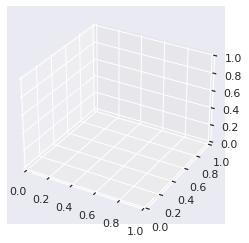

In [89]:
fig = plt.figure()
ax = plt.axes(projection='3d')


O gráfico tridimensional mais básico é uma linha ou uma coleção de pontos de dispersão criados a partir de conjuntos de triplas (x, y, z).

Analogamente aos gráficos bidimensionais mais comuns discutidos anteriormente, esses podem ser criados usando as funções ``ax.plot3D`` e ``ax.scatter3D``.

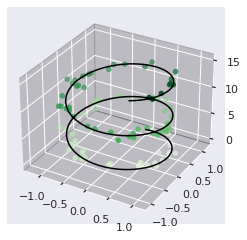

In [90]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

def set_pane_alpha(ax,alpha):
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, alpha))
    ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, alpha))
    ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, alpha)) 

set_pane_alpha(ax,0.2)

Observe que, por padrão, os pontos de dispersão têm sua transparência ajustada para proporcionar uma sensação de profundidade na página.

Embora o efeito tridimensional seja às vezes difícil de ver dentro de uma imagem estática, uma visualização interativa pode proporcionar uma boa intuição sobre o layout dos pontos.

O módulo ``mplot3d`` contém ferramentas para criar gráficos de relevo tridimensionais:

In [93]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

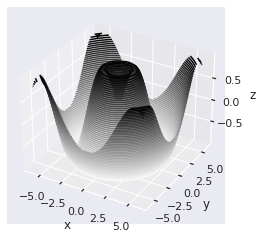

In [99]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Às vezes, o ângulo de visualização padrão não é ideal, nesse caso, podemos usar o método ``view_init``.

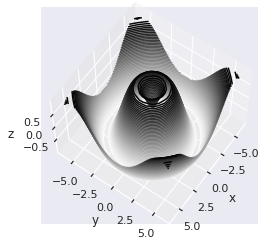

In [106]:
ax.view_init(60, 35)
fig

Outros dois tipos de gráficos tridimensionais que funcionam em dados em grade são wireframes e gráficos de superfície.
Eles pegam uma grade de valores e a projetam na superfície tridimensional especificada, facilitando a visualização das formas tridimensionais resultantes.

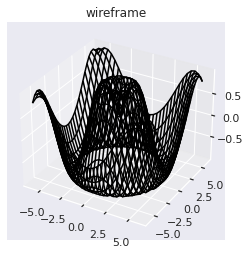

In [111]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
# ax.view_init(60, 35)
ax.set_title('wireframe'); 

Um gráfico de superfície é semelhante a um gráfico de wireframe, mas cada face do wireframe é um polígono preenchido.
Adicionar um mapa de cores aos polígonos preenchidos pode auxiliar na percepção da topologia da superfície visualizada:


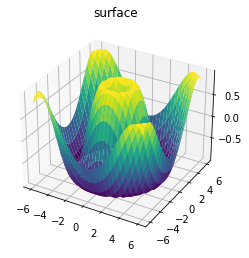

In [56]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

Observe que, embora a grade de valores para um gráfico de superfície precise ser bidimensional, ela não precisa ser retangular.
Aqui está um exemplo de criação de uma grade polar parcial, que, quando usada com o gráfico ``surface3D``, pode nos dar uma fatia da função que estamos visualizando:


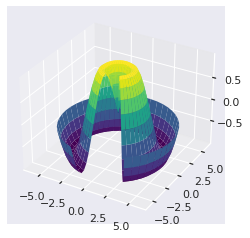

In [112]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

Para algumas aplicações, as grades uniformemente amostradas acima são excessivamente restritivas e inconvenientes.
Nessas situações, os gráficos baseados em triangulação podem ser muito úteis.

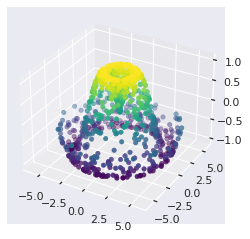

In [113]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

Para suavizar, usaremos a função ``ax.plot_trisurf``, que cria uma superfície encontrando primeiro um conjunto de triângulos formados entre pontos adjacentes (lembre-se de que x, y e z aqui são arrays unidimensionais):

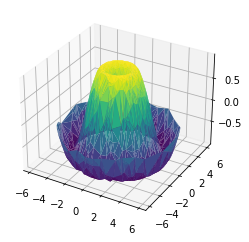

In [59]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

O resultado certamente não é tão limpo quanto quando é plotado com uma grade, mas a flexibilidade de tal triangulação permite alguns gráficos tridimensionais realmente interessantes.


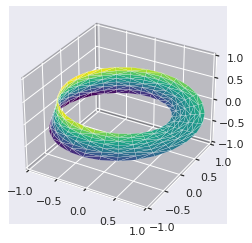

In [122]:
# Example: Visualizing a Möbius strip

theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

phi = 0.5 * theta

# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi)) 

# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)

# ax.view_init(60, 35)
set_pane_alpha(ax,0.2)

## Visualização com Seaborn

O Matplotlib provou ser uma ferramenta de visualização incrivelmente útil e popular, mas até mesmo usuários ávidos admitem que muitas vezes deixa muito a desejar.
Existem várias reclamações válidas sobre o Matplotlib que costumam surgir:

- Antes da versão 2.0, as configurações padrão do Matplotlib não eram exatamente as melhores escolhas. Era baseado no MATLAB por volta de 1999, e isso muitas vezes é evidente.
- A API do Matplotlib é relativamente de baixo nível. É possível realizar visualizações estatísticas sofisticadas, mas muitas vezes exige uma *grande* quantidade de código inicial.
- O Matplotlib precedeu o Pandas em mais de uma década e, portanto, não foi projetado para uso com ``DataFrame``s do Pandas. Para visualizar dados de um ``DataFrame`` do Pandas, é necessário extrair cada ``Series`` e muitas vezes concatená-las juntas no formato correto. Seria melhor ter uma biblioteca de plotagem que possa usar inteligentemente os rótulos do ``DataFrame`` em um gráfico.



Uma resposta a esses problemas é o [Seaborn](http://seaborn.pydata.org/). O Seaborn fornece uma API sobre o Matplotlib que oferece escolhas sensatas para o estilo do gráfico e padrões de cor, define funções simples de alto nível para tipos comuns de gráficos estatísticos e integra-se à funcionalidade fornecida pelos ``DataFrame``s do Pandas.

O Matplotlib recentemente adicionou as ferramentas ``plt.style`` e está começando a lidar com dados do Pandas de maneira mais integrada.

### Seaborn versus Matplotlib

Aqui está um exemplo de um gráfico de caminhada aleatória simples no Matplotlib, usando seu formato de gráfico clássico e cores.


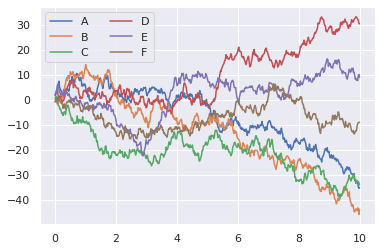

In [123]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Embora o resultado contenha todas as informações que gostaríamos que transmitisse, o faz de uma maneira que não é muito esteticamente agradável e até parece um pouco antiquado no contexto da visualização de dados do século 21.


Agora, vamos dar uma olhada em como funciona com o Seaborn.
Como veremos, o Seaborn tem muitas de suas próprias rotinas de plotagem de alto nível, mas também pode sobrescrever os parâmetros padrão do Matplotlib e, por sua vez, fazer com que até mesmo scripts simples do Matplotlib produzam saídas vastamente superiores.
Podemos definir o estilo chamando o método ``set()`` do Seaborn.
Por convenção, o Seaborn é importado como ``sns``.

In [124]:
import seaborn as sns
sns.set()

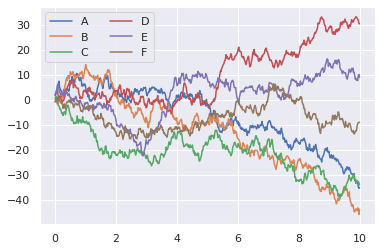

In [125]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left'); 

A ideia principal do Seaborn é fornecer comandos de alto nível para criar uma variedade de tipos de gráficos úteis para exploração de dados estatísticos, e até mesmo para ajuste de alguns modelos estatísticos.

Vamos dar uma olhada em alguns dos conjuntos de dados e tipos de gráficos disponíveis no Seaborn. Observe que todos os seguintes *poderiam* ser feitos usando comandos brutos do Matplotlib (isso, na verdade, é o que o Seaborn faz por baixo dos panos), mas a API do Seaborn é muito mais conveniente.


#### Histogramas, KDE e densidades

Frequentemente, na visualização estatística de dados, tudo o que você deseja é plotar histogramas e distribuições conjuntas de variáveis.
Vimos que isso é relativamente simples no Matplotlib:


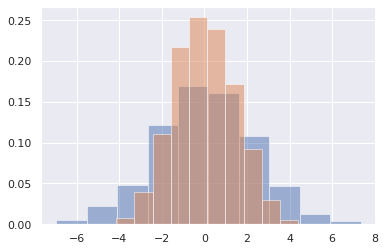

In [64]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
 
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Em vez de um histograma, podemos obter uma estimativa suave da distribuição usando uma estimativa de densidade do kernel, o que o Seaborn faz com ``sns.kdeplot``:


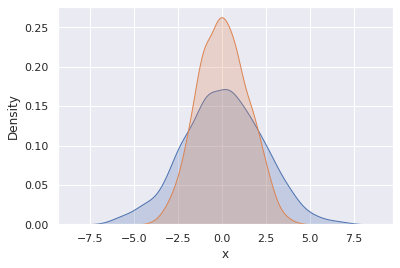

In [65]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

Se passarmos o conjunto de dados bidimensional completo para ``kdeplot``, obteremos uma visualização bidimensional dos dados:


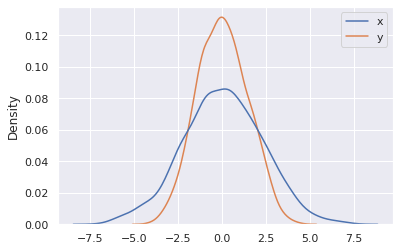

In [66]:
sns.kdeplot(data);

Podemos ver a distribuição conjunta e as distribuições marginais juntas usando ``sns.jointplot``.
Para este gráfico, vamos definir o estilo com um fundo branco:


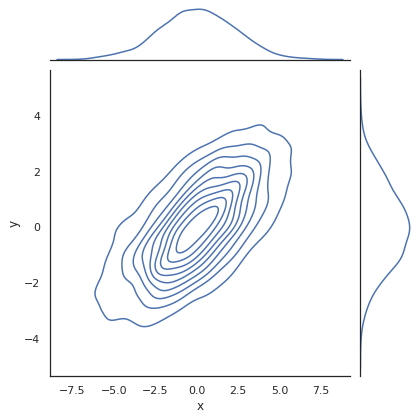

In [67]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde');

Existem outros parâmetros que podem ser passados para ``jointplot`` - por exemplo, podemos usar um histograma baseado em hexágonos:

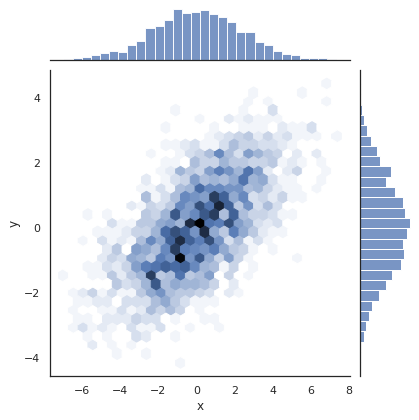

In [68]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

#### Gráficos de Pares

Quando generalizamos gráficos conjuntos para conjuntos de dados de dimensões maiores, acabamos com *gráficos de pares*. Isso é muito útil para explorar correlações entre dados multidimensionais, quando você gostaria de plotar todos os pares de valores entre si.

Vamos demonstrar isso com o conhecido conjunto de dados Iris, que lista medidas de pétalas e sépalas de três espécies de íris:



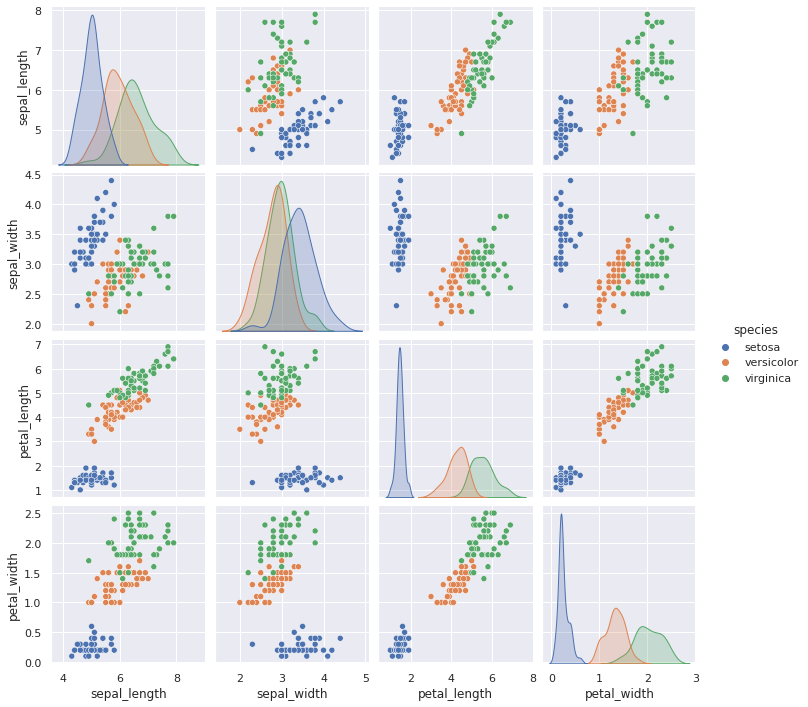

In [69]:
iris = sns.load_dataset("iris")

sns.pairplot(iris, hue='species', height=2.5);

### Histogramas Facetados

Às vezes, a melhor maneira de visualizar dados é por meio de histogramas de subconjuntos. O ``FacetGrid`` do Seaborn torna isso extremamente simples.
Vamos dar uma olhada em alguns dados que mostram a quantia que a equipe de um restaurante recebe em gorjetas com base em vários dados indicadores:


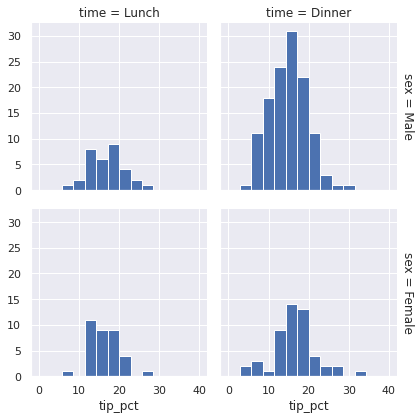

In [70]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

#### Distribuições Conjuntas

Semelhante ao pairplot, podemos usar ``sns.jointplot`` para mostrar a distribuição conjunta entre diferentes conjuntos de dados, juntamente com as distribuições marginais associadas:


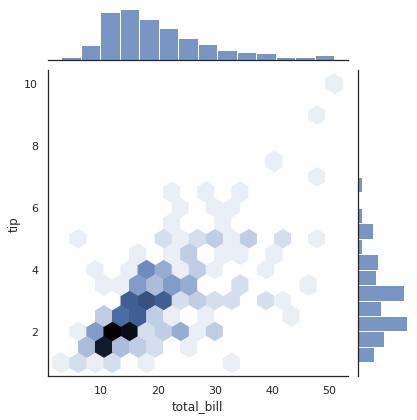

In [71]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

O joint plot até mesmo pode fazer alguma estimativa automática de densidade do kernel e regressão:

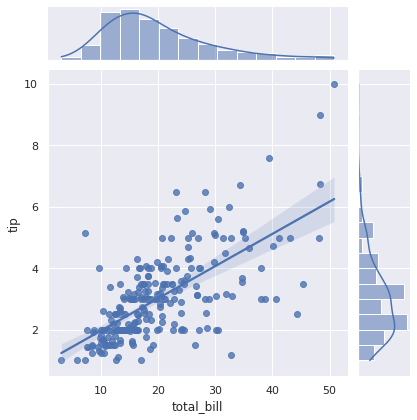

In [72]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

#### Exemplo: Explorando Tempos de Conclusão de Maratonas

Aqui vamos usar o Seaborn para ajudar a visualizar e entender os resultados de conclusão de uma maratona. Vamos começar baixando os dados da Web e carregando-os no Pandas:


In [73]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv', converters={'split':convert_time, 'final':convert_time})

data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9

data.head()


,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


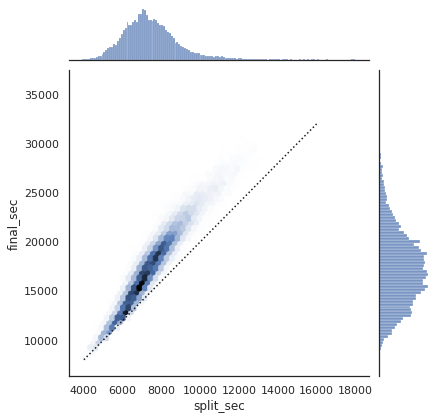

In [74]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),np.linspace(8000, 32000), ':k')

A linha pontilhada mostra onde o tempo de alguém estaria se eles corressem a maratona a um ritmo perfeitamente constante. O fato de a distribuição estar acima disso indica que a maioria das pessoas diminui a velocidade ao longo da maratona. Aqueles que fazem o oposto - correm mais rápido durante a segunda metade da corrida - são ditos ter "negative-splitado" a corrida. 

Vamos criar outra coluna nos dados, a fração de split, que mede o grau em que cada corredor faz um "negative-split" ou "positive-split" na corrida:

In [75]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Se essa diferença de split for menor que zero, a pessoa fez um "negative-split" na corrida por essa fração. Vamos fazer um gráfico de distribuição desta fração de split:


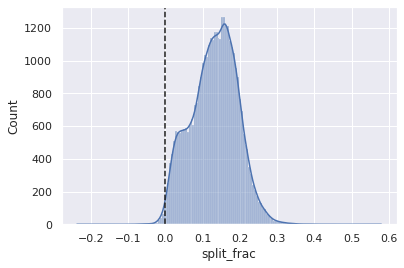

In [76]:
sns.histplot(data['split_frac'], kde=True);
plt.axvline(0, color="k", linestyle="--");

De quase 40.000 participantes, apenas 250 pessoas fizeram um "negative-split" na maratona.

In [77]:
sum(data.split_frac < 0)

251



Vamos ver se há alguma correlação entre essa fração de split e outras variáveis. Faremos isso usando um ``pairgrid``, que desenha gráficos de todas essas correlações:


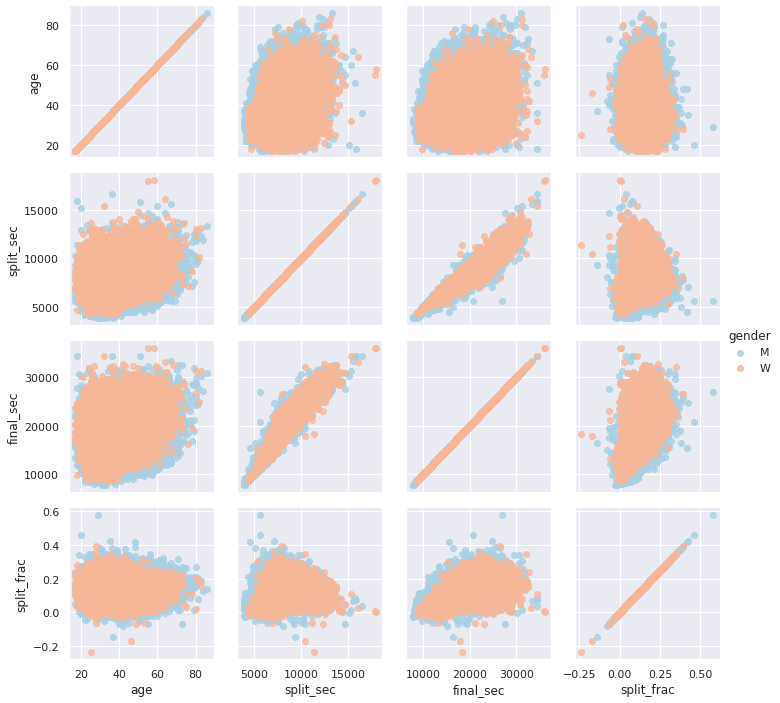

In [78]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Parece que a fração de split não se correlaciona especialmente com a idade, mas se correlaciona com o tempo final: corredores mais rápidos tendem a ter frações de split mais próximas na maratona. A diferença entre homens e mulheres aqui é interessante. Vamos dar uma olhada no histograma das frações de split para esses dois grupos:


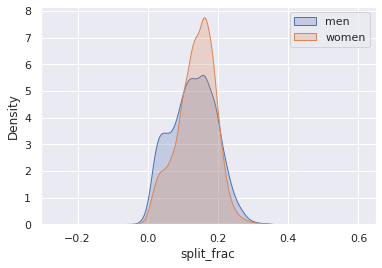

In [79]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');
plt.legend();

A coisa interessante aqui é que há muitos mais homens do que mulheres correndo com uma fração de split próxima.  Vamos ver se podemos entender o que está acontecendo olhando para as distribuições em função da idade.

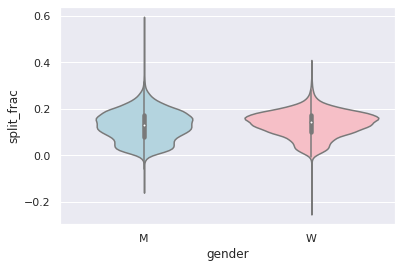

In [80]:
sns.violinplot(x="gender", y="split_frac", data=data, palette=["lightblue", "lightpink"]);

Vamos olhar um pouco mais a fundo e comparar esses violins plots em função da idade. Começaremos criando uma nova coluna no conjunto de dados que especifica a década de idade de cada pessoa:


In [81]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


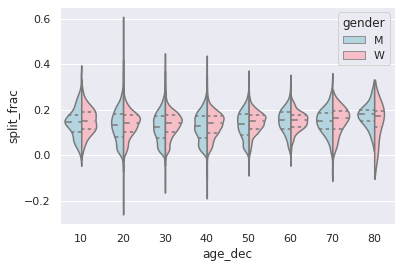

In [82]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data, split=True, inner="quartile", palette=["lightblue", "lightpink"]);

Ao observar isso, podemos ver onde as distribuições de homens e mulheres diferem: as distribuições de split dos homens dos 20 aos 50 anos mostram uma sobre-densidade pronunciada em direção a splits mais baixos quando comparados às mulheres da mesma idade (ou de qualquer idade, na verdade).



Surpreendentemente, as mulheres de 80 anos parecem superar *todos* em termos de tempo de split. Isso provavelmente se deve ao fato de estarmos estimando a distribuição a partir de um número pequeno de dados, já que há apenas um punhado de corredores nessa faixa:


In [83]:
(data.age > 80).sum()

7

De volta aos homens com "negative-splits": quem são esses corredores? Essa fração de split se correlaciona com um final mais rápido? Podemos plotar isso muito facilmente. Vamos usar ``regplot``, que ajustará automaticamente uma regressão linear aos dados:

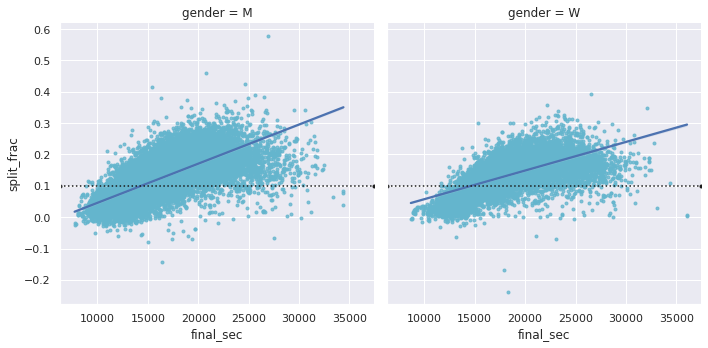

In [84]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Aparentemente, as pessoas com splits rápidos são os corredores de elite que estão terminando em cerca de 15.000 segundos, ou cerca de 4 horas. Pessoas mais lentas que isso têm menos probabilidade de ter um segundo split rápido.
